# Fantasy Football ADP Draft Position Sequence Analysis


### Introduction

This project is inspired by my passion for fantasy football (FF). For those who are unfamiliar, I'll offer a brief introduction. At the beginning of every season, about 10-12 people (we will call them owners) draft a 'fantasy team' comprised of players from different real teams in the National Football League (NFL). Whenever an owner's player contributes to his team in the real world, the owner earns fantasy points. For example, fantasy points are commonly awarded for a player's touchdowns or yards. Each week two fantasy players compete, and whoever's team scores the most wins. While there is further complexity, this is a sufficient summary. 

The purpose of this project is to help a FF player prepare to draft his/her team at the beginning of the season. There is much debate in the FF world about which position should be drafted first, second, etc. Some people prefer to draft WRs early while others Draft RBs early while others draft a QB or TE early. The perfect strategy changes year to year as each offers a different slate of players to pick. Therefore, this workbook analyzes the strategy that performed the best over the past five years.

Lastly, the world of FF is often dominated by the opinions of a few 'analysts' (some undserving of the title) that largely influence public opinion. There is little objective analysis out there. Most people just follow the analysts conjecture or a buddy. These analysts often provide meagre explanation of their opinions, and so there appears to be strong need for further analytical pursuit in this domain.

In [63]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

# This variable represents all possible draft position sequences
positions = list(itertools.permutations(['RB','RB','WR','WR','TE','QB','FLEX']))
print('# of permutations')
print(len(positions))
#Importing each player and his respective average draft position from a popular FF analytics site.
ADP2018 = pd.read_csv(r'FantasyPros_2018_Overall_ADP_Rankings.csv')
ADP2019 = pd.read_csv(r'FantasyPros_2019_Overall_ADP_Rankings.csv')
ADP2020 = pd.read_csv(r'FantasyPros_2020_Overall_ADP_Rankings.csv')
ADP2021 = pd.read_csv(r'FantasyPros_2021_Overall_ADP_Rankings.csv')
ADP2022 = pd.read_csv(r'FantasyPros_2022_Overall_ADP_Rankings.csv')

ADP2018.head()







# of permutations
5040


,Rank,Player,Team,Bye,POS,ESPN,RTSports,MFL,Fantrax,FFC,Sleeper,AVG
0,1.0,Todd Gurley II,NaN,NaN,RB1,1.0,1.0,1.0,1.0,1.0,NaN,1.0
1,2.0,Le'Veon Bell,NaN,NaN,RB2,2.0,3.0,2.0,2.0,3.0,NaN,2.4
2,3.0,David Johnson,NO,6,RB3,3.0,2.0,3.0,3.0,2.0,NaN,2.6
3,4.0,Ezekiel Elliott,DAL,8,RB4,4.0,4.0,4.0,4.0,4.0,NaN,4.0
4,5.0,Antonio Brown,NaN,NaN,WR1,5.0,6.0,5.0,5.0,5.0,NaN,5.2


In [64]:
#remove erroneous spaces. I noticed the Player column had some when viewing its csv equivalent.
ADP2018['Player'] = ADP2018['Player'].str.strip()
ADP2019['Player'] = ADP2019['Player'].str.strip()
ADP2020['Player'] = ADP2020['Player'].str.strip()
ADP2021['Player'] = ADP2021['Player'].str.strip()
ADP2022['Player'] = ADP2022['Player'].str.strip()
ADP2018.Player.head()

0     Todd Gurley II
1       Le'Veon Bell
2      David Johnson
3    Ezekiel Elliott
4      Antonio Brown
Name: Player, dtype: object

In [65]:
#remove the digits in the position column
ADP2018['POS'] = ADP2018['POS'].str.replace('\d+', '')
ADP2019['POS'] = ADP2019['POS'].str.replace('\d+', '')
ADP2020['POS'] = ADP2020['POS'].str.replace('\d+', '')
ADP2021['POS'] = ADP2021['POS'].str.replace('\d+', '')
ADP2022['POS'] = ADP2022['POS'].str.replace('\d+', '')
#check for duplicate values
print('number of duplicates 2018-2022')
print(ADP2018.Player.duplicated().sum())
print(ADP2019.Player.duplicated().sum())
print(ADP2020.Player.duplicated().sum())
print(ADP2021.Player.duplicated().sum())
print(ADP2022.Player.duplicated().sum())
print(ADP2018[ADP2018.Player.duplicated()])
print(ADP2019[ADP2019.Player.duplicated()])


number of duplicates 2018-2022
2
3
2
1
1
     Rank Player Team  Bye  POS  ESPN  RTSports  MFL  Fantrax  FFC  Sleeper  \
488   NaN    NaN  NaN  NaN  NaN   NaN       NaN  NaN      NaN  NaN      NaN   
489   NaN    NaN  NaN  NaN  NaN   NaN       NaN  NaN      NaN  NaN      NaN   

     AVG  
488  NaN  
489  NaN  
       Rank        Player Team  Bye  POS   ESPN  RTSports  MFL  Fantrax  FFC  \
840   841.0  Ryan Griffin   TB    7   QB  727.0       NaN  NaN      NaN  NaN   
1047    NaN           NaN  NaN  NaN  NaN    NaN       NaN  NaN      NaN  NaN   
1048    NaN           NaN  NaN  NaN  NaN    NaN       NaN  NaN      NaN  NaN   

      Sleeper    AVG  
840       NaN  727.0  
1047      NaN    NaN  
1048      NaN    NaN  


<ipython-input-65-83f606685f94>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ADP2018['POS'] = ADP2018['POS'].str.replace('\d+', '')
<ipython-input-65-83f606685f94>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ADP2019['POS'] = ADP2019['POS'].str.replace('\d+', '')
<ipython-input-65-83f606685f94>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ADP2020['POS'] = ADP2020['POS'].str.replace('\d+', '')
<ipython-input-65-83f606685f94>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ADP2021['POS'] = ADP2021['POS'].str.replace('\d+', '')
<ipython-input-65-83f606685f94>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ADP2022['POS'] = ADP2022['POS'].str.replace('\d+', '')


In [66]:
#checking for NULL values in the columns we will work with
print('**********player column************')
print(ADP2018[ADP2018.Player.isnull()])
print(ADP2019[ADP2019.Player.isnull()])
print(ADP2020[ADP2020.Player.isnull()])
print('**********average column************')
print(ADP2018[ADP2018.AVG.isnull()])
print(ADP2019[ADP2019.AVG.isnull()])
print(ADP2020[ADP2020.AVG.isnull()])
print('**********position column************')
print(ADP2018[ADP2018.POS.isnull()])
print(ADP2019[ADP2019.POS.isnull()])
print(ADP2020[ADP2020.POS.isnull()])



**********player column************
      Rank Player Team  Bye  POS  ESPN  RTSports  MFL  Fantrax  FFC  Sleeper  \
395  396.0    NaN  NaN  NaN        NaN       NaN  NaN    346.0  NaN      NaN   
488    NaN    NaN  NaN  NaN  NaN   NaN       NaN  NaN      NaN  NaN      NaN   
489    NaN    NaN  NaN  NaN  NaN   NaN       NaN  NaN      NaN  NaN      NaN   

       AVG  
395  346.0  
488    NaN  
489    NaN  
       Rank Player Team  Bye  POS  ESPN  RTSports  MFL  Fantrax  FFC  Sleeper  \
417   418.0    NaN  NaN  NaN        NaN       NaN  NaN    320.0  NaN      NaN   
1047    NaN    NaN  NaN  NaN  NaN   NaN       NaN  NaN      NaN  NaN      NaN   
1048    NaN    NaN  NaN  NaN  NaN   NaN       NaN  NaN      NaN  NaN      NaN   

        AVG  
417   320.0  
1047    NaN  
1048    NaN  
     Rank Player Team  Bye  POS  ESPN  RTSports  MFL  Fantrax  FFC  Sleeper  \
583   NaN    NaN  NaN  NaN  NaN   NaN       NaN  NaN      NaN  NaN      NaN   
584   NaN    NaN  NaN  NaN  NaN   NaN       NaN  NaN

In [67]:
#drop NULL values.
print(ADP2018.shape,ADP2019.shape,ADP2020.shape,ADP2021.shape,ADP2022.shape,sep = '\n')
ADP2018 = ADP2018.dropna(subset=['Player', 'POS','AVG'])
ADP2019 = ADP2019.dropna(subset=['Player', 'POS','AVG'])
ADP2020 = ADP2020.dropna(subset=['Player', 'POS','AVG'])
ADP2021 = ADP2021.dropna(subset=['Player', 'POS','AVG'])
ADP2022 = ADP2022.dropna(subset=['Player', 'POS','AVG'])
print('***new shapes***')
print(ADP2018.shape,ADP2019.shape,ADP2020.shape,ADP2021.shape,ADP2022.shape,sep = '\n')

(490, 12)
(1049, 12)
(585, 12)
(490, 12)
(355, 12)
***new shapes***
(487, 12)
(1046, 12)
(583, 12)
(488, 12)
(353, 12)


##### Because there are a few duplicate values in the name column, we will use name + position to serve as our primary key column which we will use to join to our second dataset. Remember, our first contains average draft position (ADP). Our second will contain the final points scored of each player calculated at the end of that season.

In [68]:
#primary key
ADP2018['PrimaryKey'] = ADP2018.Player+ADP2018.POS
ADP2019['PrimaryKey'] = ADP2019.Player+ADP2019.POS
ADP2020['PrimaryKey'] = ADP2020.Player+ADP2020.POS
ADP2021['PrimaryKey'] = ADP2021.Player+ADP2021.POS
ADP2022['PrimaryKey'] = ADP2022.Player+ADP2022.POS



#ensure that our primary key does not have any duplicates
print('Number of duplicate values for 2018-2022')
print(ADP2018.PrimaryKey.duplicated().sum())
print(ADP2019.PrimaryKey.duplicated().sum())
print(ADP2020.PrimaryKey.duplicated().sum())
print(ADP2021.PrimaryKey.duplicated().sum())
print(ADP2022.PrimaryKey.duplicated().sum())
ADP2018.PrimaryKey.head()









Number of duplicate values for 2018-2022
0
0
0
0
0


0     Todd Gurley IIRB
1       Le'Veon BellRB
2      David JohnsonRB
3    Ezekiel ElliottRB
4      Antonio BrownWR
Name: PrimaryKey, dtype: object

In [69]:
#Import player points scored for each year
Rank2018 = pd.read_csv(r'2018 FantasyPros_Fantasy_Football_Points_PPR.csv')
Rank2019 = pd.read_csv(r'2019 FantasyPros_Fantasy_Football_Points_PPR.csv')
Rank2020 = pd.read_csv(r'2020 FantasyPros_Fantasy_Football_Points_PPR.csv')
Rank2021 = pd.read_csv(r'2021 FantasyPros_Fantasy_Football_Points_PPR.csv')
Rank2022 = pd.read_csv(r'2022 FantasyPros_Fantasy_Football_Points_PPR.csv')
Rank2018.head()

,Rank,Player,Team,Position,Points,Games,Avg
0,1.0,Patrick Mahomes II,KC,QB,417.0,16.0,26.1
1,2.0,Saquon Barkley,NYG,RB,385.8,16.0,24.1
2,3.0,Christian McCaffrey,CAR,RB,385.5,16.0,24.1
3,4.0,Todd Gurley II,LAR,RB,372.1,14.0,26.6
4,5.0,Matt Ryan,ATL,QB,355.0,16.0,22.2


##### The following simply repeats the cleaning steps seen above


In [70]:
Rank2018['Player'] = Rank2018['Player'].str.strip()
Rank2019['Player'] = Rank2019['Player'].str.strip()
Rank2020['Player'] = Rank2020['Player'].str.strip()
Rank2021['Player'] = Rank2021['Player'].str.strip()
Rank2022['Player'] = Rank2022['Player'].str.strip()

print('**********player column************')
print(Rank2018[Rank2018.Player.isnull()])
print(Rank2019[Rank2019.Player.isnull()])
print(Rank2020[Rank2020.Player.isnull()])
print('**********average column************')
print(Rank2018[Rank2018.Avg.isnull()])
print(Rank2019[Rank2019.Avg.isnull()])
print(Rank2020[Rank2020.Avg.isnull()])
print('**********position column************')
print(Rank2018[Rank2018.Position.isnull()])
print(Rank2019[Rank2019.Position.isnull()])
print(Rank2020[Rank2020.Position.isnull()])

**********player column************
     Rank Player Team Position  Points  Games  Avg
696   NaN    NaN  NaN      NaN     NaN    NaN  NaN
697   NaN    NaN  NaN      NaN     NaN    NaN  NaN
     Rank Player Team Position  Points  Games  Avg
808   NaN    NaN  NaN      NaN     NaN    NaN  NaN
809   NaN    NaN  NaN      NaN     NaN    NaN  NaN
     Rank Player Team Position  Points  Games  Avg
740   NaN    NaN  NaN      NaN     NaN    NaN  NaN
741   NaN    NaN  NaN      NaN     NaN    NaN  NaN
**********average column************
     Rank Player Team Position  Points  Games  Avg
696   NaN    NaN  NaN      NaN     NaN    NaN  NaN
697   NaN    NaN  NaN      NaN     NaN    NaN  NaN
     Rank Player Team Position  Points  Games  Avg
808   NaN    NaN  NaN      NaN     NaN    NaN  NaN
809   NaN    NaN  NaN      NaN     NaN    NaN  NaN
     Rank Player Team Position  Points  Games  Avg
740   NaN    NaN  NaN      NaN     NaN    NaN  NaN
741   NaN    NaN  NaN      NaN     NaN    NaN  NaN
*********

In [71]:
print(Rank2018.shape,Rank2019.shape,Rank2020.shape,Rank2021.shape,Rank2022.shape,sep = '\n')
Rank2018 = Rank2018.dropna()
Rank2019 = Rank2019.dropna()
Rank2020 = Rank2020.dropna()
Rank2021 = Rank2021.dropna()
Rank2022 = Rank2022.dropna()
print('***new shapes***')
print(Rank2018.shape,Rank2019.shape,Rank2020.shape,Rank2021.shape,Rank2022.shape,sep = '\n')

(698, 7)
(810, 7)
(742, 7)
(756, 7)
(677, 7)
***new shapes***
(696, 7)
(808, 7)
(740, 7)
(754, 7)
(675, 7)


In [72]:
Rank2018['PrimaryKey'] = Rank2018.Player+Rank2018.Position
Rank2019['PrimaryKey'] = Rank2019.Player+Rank2019.Position
Rank2020['PrimaryKey'] = Rank2020.Player+Rank2020.Position
Rank2021['PrimaryKey'] = Rank2021.Player+Rank2021.Position
Rank2022['PrimaryKey'] = Rank2022.Player+Rank2022.Position




print('Reveal number of duplicate primary key values for 2018-2022')
print(Rank2018.PrimaryKey.duplicated().sum())
print(Rank2019.PrimaryKey.duplicated().sum())
print(Rank2020.PrimaryKey.duplicated().sum())
print(Rank2021.PrimaryKey.duplicated().sum())
print(Rank2022.PrimaryKey.duplicated().sum())

Rank2018.PrimaryKey.head()

Reveal number of duplicate primary key values for 2018-2022
0
0
0
0
0


0     Patrick Mahomes IIQB
1         Saquon BarkleyRB
2    Christian McCaffreyRB
3         Todd Gurley IIRB
4              Matt RyanQB
Name: PrimaryKey, dtype: object

##### The following cell corrects any typos incounterd in the name column when attempting to run the code

In [73]:
ADP2018['PrimaryKey'] = ADP2018['PrimaryKey'].replace(['Greg lsen OTE'], 'Greg OlsenTE')
ADP2020['PrimaryKey'] = ADP2020['PrimaryKey'].replace(['dell Beckham Jr. OWR'], 'Odell Beckham Jr.WR')
#this player did not end up playing this season
ADP2021 = ADP2021[ADP2021['PrimaryKey'] != 'Gus EdwardsRB']

## The cell below accomplishes most of the productivity in this workbook. It simulates a mock draft for each of the 5040 different permutations. Because this takes a fair amount of time, I commented it out. We will simply upload the finished product that I previously obtained and continue forward. Feel free to test the code for yourself. It should produce the same results.

The parameters in the function are as follows: the draftspot of the individual we are drafting for, the number of teams in the league/draft, the first dataset (for a given year), and the second dataset (for a given year). 

An assumption in this function is that all players (we will call them NPCs) except for the player we are measuring will draft the next best player available to him/her. Best is calulated as the lowest average draft position (ADP). In reality, there will be a fair amount of deviance from adp, but it is the most reliable estimate we have. We are assuming a standard team composition as seen in the "positions" varaible defined at the very top. If an NPC has already met his/her limit on a given position, the NPC will find the next lowest ADP player at an available postion. 

Similarly, the player will draft the lowest ADP by the given postion in the permutated sequence. For example if the beginning of the sequence is RB,RB,WR then the player must draft in that order even if lower adp players are available. 

also note that the 'flex' position can technically be either a RB, WR, or TE... it is the owner's choice. However, it is almost never a TE (this postion tends to score less) so we assume it must be either a WR or RB.

Lastly, in the game of FF there are a few positions unncounted for in this simulation -- defense and kicker. However, they are generally irrelevent and heavily luck dependent. Also, a player normally drafts backup players in addtion to the starters. This simulation does not include backups as they would make the simulation run even slower and complicate calculations. A player's points will only count if he is is your starting lineup, and there is no way to know how often an owner will start a given player. Therefore, we simply assume he starts his highest drafted players each game. 

In [74]:
def SimulateDraft(DraftSpot,NumTeams,ADPData,RankData):
    #this dictionary stores each sequence with resulting positions and total points scored for the player
    SeqAndScore = {}
    for i, sequence in enumerate(positions):
        #we need a fresh dataset for each sequence
        ADP = ADPData.copy()
        Rank = RankData.copy()
        #this variable houses all teams in the draft
        Teams = {}
        for x in range(NumTeams):
            #if NPC, order does not matter
            if x != DraftSpot:
                Teams[x] = ['RB','RB','WR','WR','TE','QB','FLEX']
            #if player, use appropriate sequence
            else:
                Teams[DraftSpot] = list(sequence)
        #for every position
        for position_num in range(7):
            #Theses next few lines ensure the simulation performs a 'snake' draft. Players who drafted last in the first round draft last in the second
            if position_num % 2 == 0:
                DraftOrder = range(NumTeams)
            else:
                DraftOrder = reversed(range(NumTeams))
            #for each team in the draft
            for team_num in DraftOrder:
                #check if player or NPC
                if team_num == DraftSpot:
                    '''We take the position specified in the sequence and find the next best ADP
                    of that position. this player is added to the "Teams" dictionary and the position
                    in the sequence is replaced by the player name'''
                    if sequence[position_num] != 'FLEX':
                        Teams[DraftSpot][position_num] = ADP[ADP['POS'] == sequence[position_num]]['PrimaryKey'].iloc[0]
                        # each 'Rank' is unique so it serves as a way to eliminate values from the dataframe after they are used
                        Key = ADP[ADP['POS'] == sequence[position_num]]['Rank'].iloc[0]
                        #remove drafted player from the pool of available players to draft
                        ADP = ADP[ADP['Rank'] != Key]
                    #if position is flex, we find next best RB or WR
                    else:
                        Teams[DraftSpot][position_num] = ADP[(ADP['POS'] == 'WR')|(ADP['POS'] == 'RB')]['PrimaryKey'].iloc[0]
                        Key = ADP[(ADP['POS'] == 'WR')|(ADP['POS'] == 'RB')]['Rank'].iloc[0]
                        ADP = ADP[ADP['Rank'] != Key]
                #if NPC
                else:
                    '''The NPC is not forced to follow a sequence of drafting certain player postitions
                    so it takes the next best player if it has room for that type. The counter is used to 
                    increment through the dataset if the NPC has met its limit for a given postion type'''
                    counter = 0
                    while 'RB' in Teams[team_num] or 'WR' in Teams[team_num] or 'TE' in Teams[team_num] \
                    or 'QB' in Teams[team_num] or 'FLEX' in Teams[team_num]:
                        Position = ADP['POS'].iloc[counter]
                        Player = ADP['PrimaryKey'].iloc[counter]
                        Key = ADP['Rank'].iloc[counter]
                        if Position in Teams[team_num]:
                            #this is the index of the list of postions for this particular NPC
                            index = Teams[team_num].index(Position)
                            #the index is replaced with the player
                            Teams[team_num][index] = Player
                            #remove the drafted player
                            ADP = ADP[ADP['Rank'] != Key]
                            break
                        elif 'FLEX' in Teams[team_num]:
                            #repeat process except with RB or WR
                            Player = ADP[(ADP['POS'] == 'RB') | (ADP['POS'] == 'WR')]['PrimaryKey'].iloc[0]
                            Key = ADP[(ADP['POS'] == 'RB') | (ADP['POS'] == 'WR')]['Rank'].iloc[0]
                            index = Teams[team_num].index('FLEX')
                            Teams[team_num][index] = Player
                            ADP = ADP[ADP['Rank'] != Key]
                            break
                        else:
                            counter +=1
        #this is our team   
        MyTeam = Teams[DraftSpot]
        #store the final scores of each player on the team
        ScoreList = []
        #store the positions of each player
        PosList = []
        for player in MyTeam:
            
            #get scores from the second dataset
            ScoreList.append(Rank[Rank['PrimaryKey'] == player]['Points'].iloc[0])
            PosList.append(Rank[Rank['PrimaryKey'] == player]['Position'].iloc[0])
        #store the scores/positions as a value in a dictionary with the respective sequence as the key
        SeqAndScore[i] = (PosList,sum(ScoreList))
    return SeqAndScore

##### see the above chunk of text for explanation on the following commented code

In [75]:
'''Year2018 = SimulateDraft(DraftSpot = 6,NumTeams =12,ADPData = ADP2018, RankData = Rank2018)
print(Year2018)
Year2019 = SimulateDraft(DraftSpot = 6,NumTeams =12,ADPData = ADP2019, RankData = Rank2019)
print(Year2019)
Year2020 = SimulateDraft(DraftSpot = 6,NumTeams =12,ADPData = ADP2020, RankData = Rank2020)
print(Year2020)
Year2021 = SimulateDraft(DraftSpot = 6,NumTeams =12,ADPData = ADP2021, RankData = Rank2021)
print(Year2021)
Year2022 = SimulateDraft(DraftSpot = 6,NumTeams =12,ADPData = ADP2022, RankData = Rank2022)
print(Year2022)'''


'Year2018 = SimulateDraft(DraftSpot = 6,NumTeams =12,ADPData = ADP2018, RankData = Rank2018)\nprint(Year2018)\nYear2019 = SimulateDraft(DraftSpot = 6,NumTeams =12,ADPData = ADP2019, RankData = Rank2019)\nprint(Year2019)\nYear2020 = SimulateDraft(DraftSpot = 6,NumTeams =12,ADPData = ADP2020, RankData = Rank2020)\nprint(Year2020)\nYear2021 = SimulateDraft(DraftSpot = 6,NumTeams =12,ADPData = ADP2021, RankData = Rank2021)\nprint(Year2021)\nYear2022 = SimulateDraft(DraftSpot = 6,NumTeams =12,ADPData = ADP2022, RankData = Rank2022)\nprint(Year2022)'

In [76]:
#convert dictionaries to dataframe
'''
#2018
PositionsList = [x[0] for x in Year2018.values()]
ScoreList = [x[1] for x in Year2018.values()]
df2018 = pd.DataFrame(PositionsList, columns =['Pick_1', 'Pick_2', 'Pick_3','Pick_4', 'Pick_5', 'Pick_6','Pick_7'], dtype = str)
df2018['TotalScore'] = ScoreList
print(df2018.head())
df2018.to_csv("Simulated2018")
#2019
PositionsList = [x[0] for x in Year2019.values()]
ScoreList = [x[1] for x in Year2019.values()]
df2019 = pd.DataFrame(PositionsList, columns =['Pick_1', 'Pick_2', 'Pick_3','Pick_4', 'Pick_5', 'Pick_6','Pick_7'], dtype = str)
df2019['TotalScore'] = ScoreList
print(df2019.head())
df2019.to_csv("Simulated2019")

#2020
PositionsList = [x[0] for x in Year2020.values()]
ScoreList = [x[1] for x in Year2020.values()]
df2020 = pd.DataFrame(PositionsList, columns =['Pick_1', 'Pick_2', 'Pick_3','Pick_4', 'Pick_5', 'Pick_6','Pick_7'], dtype = str)
df2020['TotalScore'] = ScoreList
print(df2020.head())
df2020.to_csv("Simulated2020")
#2021
PositionsList = [x[0] for x in Year2021.values()]
ScoreList = [x[1] for x in Year2021.values()]
df2021 = pd.DataFrame(PositionsList, columns =['Pick_1', 'Pick_2', 'Pick_3','Pick_4', 'Pick_5', 'Pick_6','Pick_7'], dtype = str)
df2021['TotalScore'] = ScoreList
print(df2021.head())
df2021.to_csv("Simulated2021")
#2022
PositionsList = [x[0] for x in Year2022.values()]
ScoreList = [x[1] for x in Year2022.values()]
df2022 = pd.DataFrame(PositionsList, columns =['Pick_1', 'Pick_2', 'Pick_3','Pick_4', 'Pick_5', 'Pick_6','Pick_7'], dtype = str)
df2022['TotalScore'] = ScoreList
#we scale this by 17/12 because 2022 season is not finished. It is in week 12 of 17.
df2022['TotalScore'] = df2022['TotalScore'] * 17/12
print(df2022.head())
df2022.to_csv("Simulated2022")'''

'\n#2018\nPositionsList = [x[0] for x in Year2018.values()]\nScoreList = [x[1] for x in Year2018.values()]\ndf2018 = pd.DataFrame(PositionsList, columns =[\'Pick_1\', \'Pick_2\', \'Pick_3\',\'Pick_4\', \'Pick_5\', \'Pick_6\',\'Pick_7\'], dtype = str)\ndf2018[\'TotalScore\'] = ScoreList\nprint(df2018.head())\ndf2018.to_csv("Simulated2018")\n#2019\nPositionsList = [x[0] for x in Year2019.values()]\nScoreList = [x[1] for x in Year2019.values()]\ndf2019 = pd.DataFrame(PositionsList, columns =[\'Pick_1\', \'Pick_2\', \'Pick_3\',\'Pick_4\', \'Pick_5\', \'Pick_6\',\'Pick_7\'], dtype = str)\ndf2019[\'TotalScore\'] = ScoreList\nprint(df2019.head())\ndf2019.to_csv("Simulated2019")\n\n#2020\nPositionsList = [x[0] for x in Year2020.values()]\nScoreList = [x[1] for x in Year2020.values()]\ndf2020 = pd.DataFrame(PositionsList, columns =[\'Pick_1\', \'Pick_2\', \'Pick_3\',\'Pick_4\', \'Pick_5\', \'Pick_6\',\'Pick_7\'], dtype = str)\ndf2020[\'TotalScore\'] = ScoreList\nprint(df2020.head())\ndf2020.to_

In [77]:
#as mentioned above... here is the output from the commented code
DF2018 = pd.read_csv(r'Simulated2018')
DF2019 = pd.read_csv(r'Simulated2019')
DF2020 = pd.read_csv(r'Simulated2020')
DF2021 = pd.read_csv(r'Simulated2021')
DF2022 = pd.read_csv(r'Simulated2022')
#sort values to see the best sequences
DF2018 = DF2018.sort_values('TotalScore')
DF2019 = DF2019.sort_values('TotalScore')
DF2020 = DF2020.sort_values('TotalScore')
DF2021 = DF2021.sort_values('TotalScore')
DF2022 = DF2022.sort_values('TotalScore')

Before we move forward. Lets do some preliminary analysis on points scored for each position irregardless to the simulation. We combine all years worth of rankings but only take the first 84 of each since this is the number of players taken in each draft in the simulation I am demonstrating (spot 6 with 12 people drafting). Including results from the entire dataset would be less accurate since most of the players will never be drafted or used on someone's team. We will also get a second dataset that includes room for bench players because some positions like TE are stacked at the very top but quickly fall in value. This value drop is not seen just viewing starters, and it,s worth observing since bench players can provide some supplementary assistance to a team, or your starters could get injured.

##### the dataframes above are not relevent to the immdediately following code

In [78]:
#only columns and rows we need for starting lineup + fivel bench spots.
Rank2018B = Rank2018[['Player','Position','Points']].iloc[:12*12]
Rank2019B = Rank2019[['Player','Position','Points']].iloc[:12*12]
Rank2020B = Rank2020[['Player','Position','Points']].iloc[:12*12]
Rank2021B = Rank2021[['Player','Position','Points']].iloc[:12*12]
Rank2022B = Rank2022[['Player','Position','Points']].iloc[:12*12]

#only columns and rows we need for starting lineup
Rank2018 = Rank2018[['Player','Position','Points']].iloc[:7*12]
Rank2019 = Rank2019[['Player','Position','Points']].iloc[:7*12]
Rank2020 = Rank2020[['Player','Position','Points']].iloc[:7*12]
Rank2021 = Rank2021[['Player','Position','Points']].iloc[:7*12]
Rank2022 = Rank2022[['Player','Position','Points']].iloc[:7*12]
#multiplying by 17/12 since this season is unfinished... data is scaled
Rank2022['Points'] = Rank2022['Points'] * 17/12

In [79]:
#combine all years into df named Big
print('size of dataframe:',str(len(Rank2018)+len(Rank2019)+len(Rank2020)+len(Rank2021)+len(Rank2022)) +' ;)')
L = [Rank2018,Rank2019,Rank2020,Rank2021,Rank2022,]
Big = pd.concat(L)
Big.head()

size of dataframe: 420 ;)


,Player,Position,Points
0,Patrick Mahomes II,QB,417.0
1,Saquon Barkley,RB,385.8
2,Christian McCaffrey,RB,385.5
3,Todd Gurley II,RB,372.1
4,Matt Ryan,QB,355.0


In [80]:
#store descriptive statsitcs of Big in Stats dictionary for each position
Stats = {}
rb = Big[Big.Position == 'RB'].describe()
wr = Big[Big.Position == 'WR'].describe()
te = Big[Big.Position == 'TE'].describe()
qb = Big[Big.Position == 'QB'].describe()
Stats['RB'] = [rb.loc['mean'][0],rb.loc['25%'][0],rb.loc['50%'][0],rb.loc['75%'][0]]
Stats['WR'] = [wr.loc['mean'][0],wr.loc['25%'][0],wr.loc['50%'][0],wr.loc['75%'][0]]
Stats['TE'] = [te.loc['mean'][0],te.loc['25%'][0],te.loc['50%'][0],te.loc['75%'][0]]
Stats['QB'] = [qb.loc['mean'][0],qb.loc['25%'][0],qb.loc['50%'][0],qb.loc['75%'][0]]
print('mean, 25%, median,', '50%')
sorted(Stats.items(), key=lambda x: Stats[x[0]][0], reverse=True)

mean, 25%, median, 50%


[('QB', [280.32388451443575, 235.5875, 271.3, 329.25]),
 ('RB', [245.05015432098767, 200.5, 229.05, 272.34375]),
 ('TE', [243.0375, 206.68333333333334, 222.35, 279.02500000000003]),
 ('WR', [237.84953703703704, 198.6, 227.55, 261.15])]

##### We will repeat the same process in the next few cells for a dataframe including some bench players

In [81]:
#repeat the process to include 5 bench players represented by BigB
print(len(Rank2018B)+len(Rank2019B)+len(Rank2020B)+len(Rank2021B)+len(Rank2022B))
L = [Rank2018B,Rank2019B,Rank2020B,Rank2021B,Rank2022B,]
BigB = pd.concat(L)
BigB.head()

720


,Player,Position,Points
0,Patrick Mahomes II,QB,417.0
1,Saquon Barkley,RB,385.8
2,Christian McCaffrey,RB,385.5
3,Todd Gurley II,RB,372.1
4,Matt Ryan,QB,355.0


In [82]:
#descriptive stats for bench players
StatsB = {}
rb = BigB[BigB.Position == 'RB'].describe()
wr = BigB[BigB.Position == 'WR'].describe()
te = BigB[BigB.Position == 'TE'].describe()
qb = BigB[BigB.Position == 'QB'].describe()
StatsB['RB'] = [rb.loc['mean'][0],rb.loc['25%'][0],rb.loc['50%'][0],rb.loc['75%'][0]]
StatsB['WR'] = [wr.loc['mean'][0],wr.loc['25%'][0],wr.loc['50%'][0],wr.loc['75%'][0]]
StatsB['TE'] = [te.loc['mean'][0],te.loc['25%'][0],te.loc['50%'][0],te.loc['75%'][0]]
StatsB['QB'] = [qb.loc['mean'][0],qb.loc['25%'][0],qb.loc['50%'][0],qb.loc['75%'][0]]
print('mean, 25%, median,', '75%')
sorted(StatsB.items(), key=lambda x: Stats[x[0]][0], reverse=True)

mean, 25%, median, 75%


[('QB', [246.14304635761593, 187.9, 240.0, 295.3]),
 ('RB', [198.1903409090909, 153.5, 187.05, 229.025]),
 ('TE', [173.5412698412698, 144.75, 160.4, 195.8]),
 ('WR', [196.05836575875486, 151.9, 185.3, 232.9])]

In [83]:
#Convert into two dataframes named as DFBig and DFBigB
print('DF without bench players followed by DF that includes five bench players')
print('Sorted by mean from largest to smallest')
POSB = [x for x in StatsB.keys()]
POS = [x for x in Stats.keys()]
DFBig =pd.DataFrame(Stats.values(), columns =['Mean', '25%','Median', '75%' ], dtype = int)
DFBig['Position'] = POS
DFBigB =pd.DataFrame(StatsB.values(), columns =['Mean', '25%','Median', '75%' ], dtype = int)
DFBigB['Position'] = POSB
DFBig = DFBig.sort_values('Mean',ascending = False)
DFBigB = DFBigB.sort_values('Mean',ascending = False)
display(DFBig,DFBigB)

DF without bench players followed by DF that includes five bench players
Sorted by mean from largest to smallest


<ipython-input-83-1958b06dacef>:6: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  DFBig =pd.DataFrame(Stats.values(), columns =['Mean', '25%','Median', '75%' ], dtype = int)
<ipython-input-83-1958b06dacef>:8: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  DFBigB =pd.DataFrame(StatsB.values(), columns =['Mean', '25%','Median', '75%' ], dtype = int)


,Mean,25%,Median,75%,Position
3,280,235,271,329,QB
0,245,200,229,272,RB
2,243,206,222,279,TE
1,237,198,227,261,WR


,Mean,25%,Median,75%,Position
3,246,187,240,295,QB
0,198,153,187,229,RB
1,196,151,185,232,WR
2,173,144,160,195,TE


##### Plotting the results for the starters only

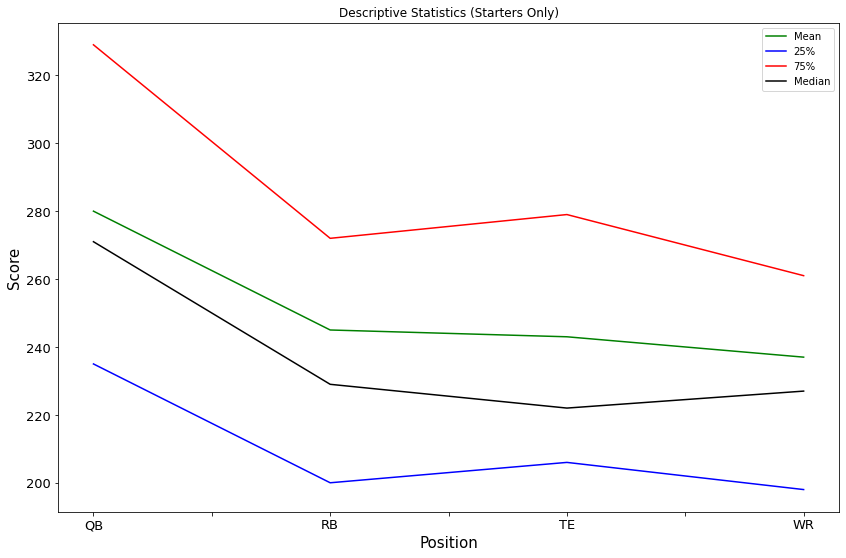

In [84]:
#plot the results on line chart with eachcolor a different statistic
ax = plt.gca() 

DFBig.plot(kind = 'line',
        x = 'Position',
        y = 'Mean',
        color = 'green',fontsize=13,ax = ax,figsize=(14,9))
DFBig.plot(kind = 'line',
        x = 'Position',
        y = '25%',
        color = 'blue',ax = ax)
DFBig.plot(kind = 'line',
        x = 'Position',
        y = '75%',
        color = 'red',ax = ax)
DFBig.plot(kind = 'line',
        x = 'Position',
        y = 'Median',
        color = 'black',ax = ax)
# set the title
plt.ylabel('Score',fontsize=15)
plt.xlabel('Position', fontsize=15)
plt.title('Descriptive Statistics (Starters Only)')


plt.show()


Plotting the results for starters and bench

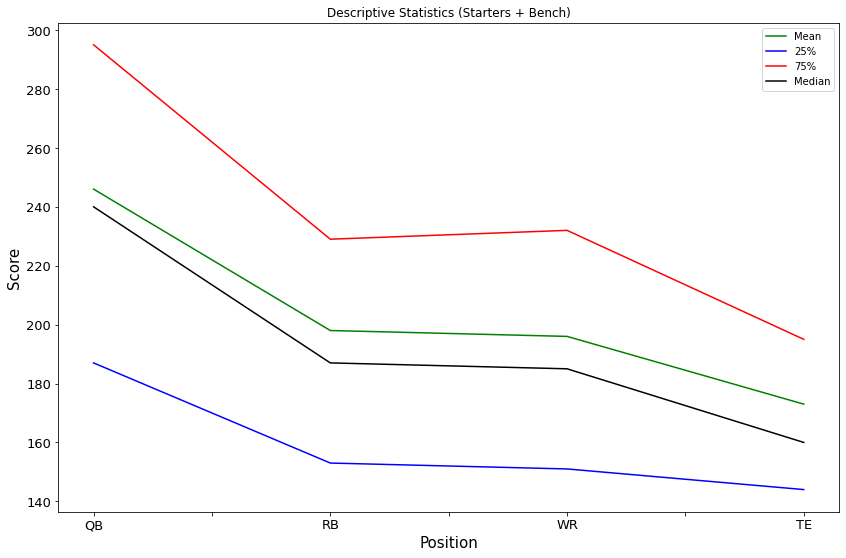

In [85]:
#plot the results on line chart with eachcolor a different statistic
ax = plt.gca() 
DFBigB.plot(kind = 'line',
        x = 'Position',fontsize=13,
        y = 'Mean',
        color = 'green',ax = ax,figsize=(14,9))
DFBigB.plot(kind = 'line',
        x = 'Position',
        y = '25%',
        color = 'blue',ax = ax)
DFBigB.plot(kind = 'line',
        x = 'Position',
        y = '75%',
        color = 'red',ax = ax)
DFBigB.plot(kind = 'line',
        x = 'Position',
        y = 'Median',
        color = 'black',ax = ax)
# show the plot
plt.title('Descriptive Statistics (Starters + Bench)')
plt.ylabel('Score',fontsize=15)
plt.xlabel('Position', fontsize=15)
plt.show()

As seen, QB>RB>WRandTE in both dataframes. However, as expected, TE avoids last place in only the starters dataframe. Bench player WRs are much more capable than Bench TEs. I was very surprised that they even scored higher than WR in any of the tables. This can be explained as there are a few very high level TEs at the top, and only one TE is drafted on a team, so the elite players of this position are depleted more slowly. However, there is a giant cliff after these elite players (also why people do not draft TE for flex postion).

Another observation is that the median is consistently below the average in both figures. This suggests that the draft is top heavy. In the starter dataset, there is a larger gap between 75% and the median than in the bench dataset which is further evidence of the distribution. 

Finally, it was expected that QB would finish at the top and TE would be near the bottom. However, I am surprised that WR is not second on the list. From my experience, WRs have appeared to score more points. However, the actual dataframe values in addition to the slop of the graph reveals that RB and WR are almost identical. QB scores the most. TE offers some big points potential but only if you get one of the top ones.

Now that we know some about general scoring distribution of each position let's examine the draft sequencing
##### Commented code datasets are retrieved and combined into one large dataframe

In [86]:
#results from commented code that have been uploaded
Simulated2018 = pd.read_csv(r'Simulated2018')
Simulated2019 = pd.read_csv(r'Simulated2019')
Simulated2020 = pd.read_csv(r'Simulated2020')
Simulated2021 = pd.read_csv(r'Simulated2021')
Simulated2022 = pd.read_csv(r'Simulated2022')
print('length of files')
print(len(Simulated2018)+len(Simulated2019)+len(Simulated2020)+len(Simulated2021)+len(Simulated2022))
#create dataframe housing all years
L = [Simulated2018,Simulated2019,Simulated2020,Simulated2021,Simulated2022]
SimulatedAll = pd.concat(L)
print('length of dataframe','\n',len(SimulatedAll))
SimulatedAll.drop(columns = 'Unnamed: 0',inplace = True)
SimulatedAll = SimulatedAll.sort_values('TotalScore', ascending = False)
SimulatedAll


length of files
25200
length of dataframe 
 25200


,Pick_1,Pick_2,Pick_3,Pick_4,Pick_5,Pick_6,Pick_7,TotalScore
4682,RB,WR,RB,RB,TE,WR,QB,2051.7
4586,RB,WR,RB,RB,TE,WR,QB,2051.7
4562,RB,WR,RB,RB,TE,WR,QB,2051.7
4706,RB,WR,RB,RB,TE,WR,QB,2051.7
4826,RB,TE,RB,RB,WR,WR,QB,2021.9
...,...,...,...,...,...,...,...,...
133,RB,WR,RB,QB,WR,RB,TE,823.9
853,RB,WR,RB,QB,WR,RB,TE,823.9
973,RB,WR,RB,QB,WR,RB,TE,823.9
4700,RB,WR,RB,QB,WR,RB,TE,823.9


From an initial glance, it looks like QB may be best saved for a later pick. TE probably should not be saved for the last pick but should not be taken too early either. RB,WR,RB,RB,TE,WR,QB yields the best results. Note that the repeat values are either a flex position shuffling around or a different year.

In order to determine the effect of each position in each draft spot, one can utilize regression. Because the data is categorial, we use "one hot encoding" by converting each scenario into a binary. This allows the machine to understand what RB means.

In [87]:
Y = SimulatedAll['TotalScore']
X = SimulatedAll.drop('TotalScore',axis = 1)
print('separated data into x and y\n\n')
print(X,Y,sep = '\n')
print('\n\n new columns\n')
X = pd.get_dummies(data=X)
print(X.columns)

separated data into x and y


     Pick_1 Pick_2 Pick_3 Pick_4 Pick_5 Pick_6 Pick_7
4682     RB     WR     RB     RB     TE     WR     QB
4586     RB     WR     RB     RB     TE     WR     QB
4562     RB     WR     RB     RB     TE     WR     QB
4706     RB     WR     RB     RB     TE     WR     QB
4826     RB     TE     RB     RB     WR     WR     QB
...     ...    ...    ...    ...    ...    ...    ...
133      RB     WR     RB     QB     WR     RB     TE
853      RB     WR     RB     QB     WR     RB     TE
973      RB     WR     RB     QB     WR     RB     TE
4700     RB     WR     RB     QB     WR     RB     TE
4580     RB     WR     RB     QB     WR     RB     TE

[25200 rows x 7 columns]
4682    2051.7
4586    2051.7
4562    2051.7
4706    2051.7
4826    2021.9
         ...  
133      823.9
853      823.9
973      823.9
4700     823.9
4580     823.9
Name: TotalScore, Length: 25200, dtype: float64


 new columns

Index(['Pick_1_QB', 'Pick_1_RB', 'Pick_1_TE', 'Pick_1_WR', 'Pick_2_

Now we split the data into training and testing so we can more accurately estimate the effectiveness of our model. Failure to do this would reward the model for fitting to random patterns in the dataset. Note that if there is not predictive power then maybe draft postion sequence does not matter.

In [88]:
import sklearn.model_selection 
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y,shuffle = True, test_size=0.25,train_size=.75, random_state=421)
print(X_train.shape)
print(X_test.shape)
print(Y.shape)

(18900, 28)
(6300, 28)
(25200,)


##### Here is the model which uses our train and test data. Note that the coefficients are scaled so as to make more legible.

In [89]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(X_train,Y_train)
coef = model.coef_
print('intercept')
print(model.intercept_)
print('\ncoefficients\n')
print(coef)
print('\n\n\nFinally we have each position at each spot in the draft and their predicted effects on the points scored by a fantasy player')
ModelDF = pd.DataFrame(X.columns,coef,columns = ['Pick/Position'])
ModelDF.index.name='coefficients'
ModelDF = ModelDF.sort_index()
ModelDF = ModelDF.reset_index()
#scale
ModelDF['coefficients']= ModelDF.coefficients / 10**14
print(type(ModelDF))
ModelDF


intercept
-8063534649422367.0

coefficients

[ 1.69441301e+15  2.60214175e+15  2.80657435e+15  2.60214175e+15
 -1.01524438e+15 -1.07515643e+14  9.69169634e+13 -1.07515643e+14
  2.07279312e+15  2.98052185e+15  3.18495446e+15  2.98052185e+15
 -4.88072569e+14  4.19656164e+14  6.24088770e+14  4.19656164e+14
 -2.65538388e+15 -1.74765514e+15 -1.54322254e+15 -1.74765514e+15
 -5.53092385e+12  9.02197809e+14  1.10663042e+15  9.02197809e+14
  2.80975526e+15  3.71748399e+15  3.92191660e+15  3.71748399e+15]



Finally we have each position at each spot in the draft and their predicted effects on the points scored by a fantasy player
<class 'pandas.core.frame.DataFrame'>


,coefficients,Pick/Position
0,-26.553839,Pick_5_QB
1,-17.476551,Pick_5_RB
2,-17.476551,Pick_5_WR
3,-15.432225,Pick_5_TE
4,-10.152444,Pick_2_QB
5,-4.880726,Pick_4_QB
6,-1.075156,Pick_2_WR
7,-1.075156,Pick_2_RB
8,-0.055309,Pick_6_QB
9,0.969170,Pick_2_TE


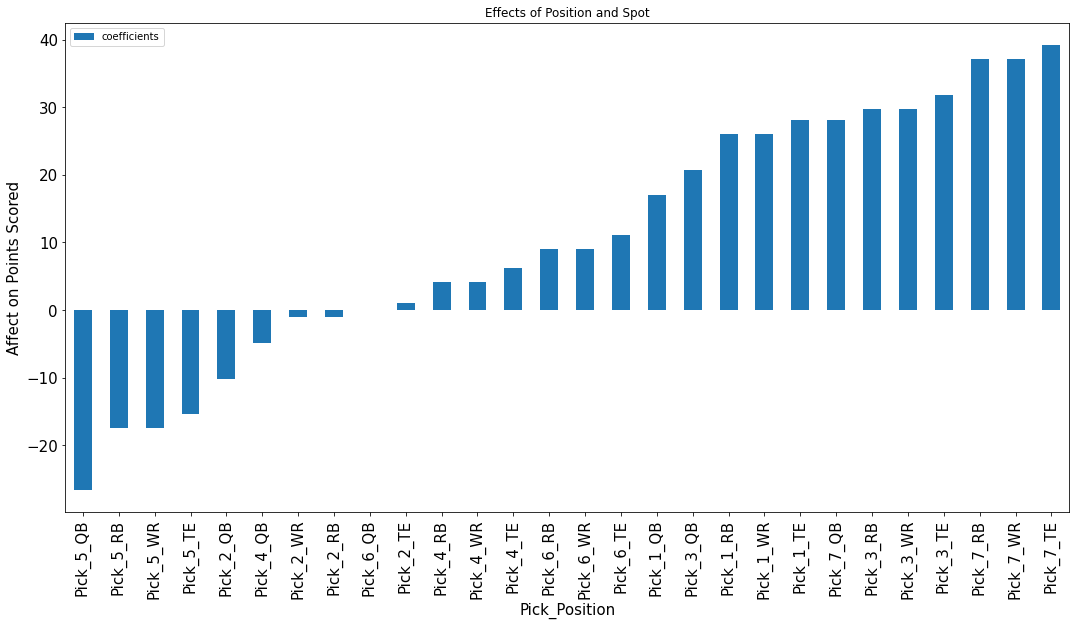

In [90]:
ModelDF.plot.bar(x='Pick/Position',y = 'coefficients',figsize=(18,9),fontsize = 15)
plt.title('Effects of Position and Spot')
plt.ylabel('Affect on Points Scored',fontsize=15)
plt.xlabel('Pick_Position', fontsize=15)
plt.show()

The results are sporadic and vary greatly when I adjust the random state in the regression model. Therefore, it's difficult to complete any analysis. Ulitmately the model is not very good. For example, every single position in pick five is strongly negative. The low R^2 value at the bottom confirms it. I did notice through most of my random state changes that TE at pick three often remained high. This variable may have one of the stronger relationships with score. Another item that could be worth measuring is the average impact of a draft spot (as opposed to position). This might indicate that unexpectedly high scoring players are drafted here. One simple measure may be finding the average spot of the first 14 lowest values in the list of coefficients and the average of the highest... seen below.

In [91]:

ModelDF['Spot'] = ModelDF['Pick/Position'].str.extract("(\d+)").astype(int)
print('average draft position of 14 lowest values in coefficients')
print(ModelDF['Spot'].iloc[:13].mean())
print('\n average draft position of 14 highest values in coefficients')
print(ModelDF['Spot'].iloc[13:].mean())

average draft position of 14 lowest values in coefficients
3.8461538461538463

 average draft position of 14 highest values in coefficients
4.133333333333334


##### Now we plot our predicted values on our test data with the actual results and find the R2

[Text(0.5, 1.0, 'Model Correlation With True Values')]

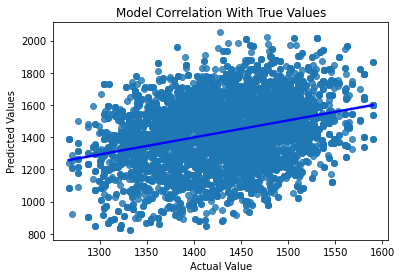

In [92]:
import seaborn as sns
#get predictions
prediction = model.predict(X_test)
df = pd.DataFrame(prediction,Y_test)
df.columns = ['Actual Value']
df.index.name = 'Predicted Values'

#compare predictions to actual values
sns.regplot(x='Actual Value',y=df.index, data = df, line_kws = {'color': 'b'}).set(title='Model Correlation With True Values')

In [93]:
#R squared
model.score(X_test,Y_test)

0.10007600611538392

The model is clearly not a strong one. However, at least the model is better than a blind guess as demonstrated from the positively sloped line in the graphic. It also appears that the results may be most disparate in the middle; the ends of the range show dots closer to the line. Therefore, the model might be slightly more reliable when it predicts an extreme score.
One shortcoming of the model is that it does not take (to my knowledge) any interaction terms into account. A fuller model should be created that includes, for example, the effects of drafting 3 RBs in a row. In a future project, it would also be worth taking a closer look at which draft spots make or break a player... which draft spots are the most difficult or important to get right. I also would like to see if players drafing at a certain position relative to his/her peers (first pick vs 6th pick vs 12th) effects the results. Finally, measuring the value of a certain round pick could be useful since people can trade draft spots. For example, I would like to know if trading my 1st pick for someone's second and fourth is a net gain or loss in points.